In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

1. Dataset: Breast Cancer Wisconsin (Diagnostic)
- Target: variável alvo é a diagnosis (M = maligno, B = benigno)
- Descrição: O dataset contém informações de características dos núcleos celulares presentes em imagens digitalizadas de massas mamárias. O objetivo é prever se a massa é maligna ou benigna.
- Exercício: Crie um modelo de classificação para prever a variável alvo utilizando MultinomialNB e avalie o desempenho usando validação cruzada com 10 folds. Depois, repita o processo utilizando LogisticRegression.

In [36]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Treinando o modelo Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [38]:
# Treinando o modelo Regressão Logística
lr = LogisticRegression(random_state=1032)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

c:\Users\luana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Matriz de confusão
conf_nb = confusion_matrix(y_test, y_pred_nb)
conf_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusão Naive Bayes:\n", conf_nb)
print("Matriz de confusão Regressão Logística:\n", conf_lr)

Matriz de confusão Naive Bayes:
 [[ 50  13]
 [  2 106]]
Matriz de confusão Regressão Logística:
 [[ 59   4]
 [  1 107]]


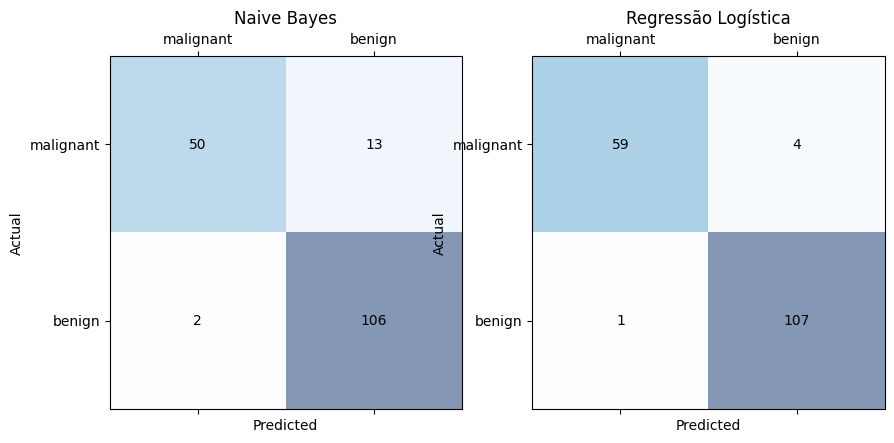

In [40]:
# Plotando a matriz de confusão
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].matshow(conf_nb, cmap=plt.cm.Blues, alpha=0.5)
ax[0].set_title("Naive Bayes")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels(breast_cancer.target_names)
ax[0].set_yticklabels(breast_cancer.target_names)
for i in range(2):
    for j in range(2):
        ax[0].text(j, i, str(conf_nb[i][j]), ha="center", va="center")

ax[1].matshow(conf_lr, cmap=plt.cm.Blues, alpha=0.5)
ax[1].set_title("Regressão Logística")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
ax[1].set_xticklabels(breast_cancer.target_names)
ax[1].set_yticklabels(breast_cancer.target_names)
for i in range(2):
    for j in range(2):
        ax[1].text(j, i, str(conf_lr[i][j]), ha="center", va="center")

plt.show()

In [41]:
# Acurácia
print("Acurácia Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_lr))

Acurácia Naive Bayes: 0.9122807017543859
Acurácia Regressão Logística: 0.9707602339181286


In [42]:
# Precisão
print("Precisão Naive Bayes:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Precisão Regressão Logística:", precision_score(y_test, y_pred_lr, average='weighted'))

Precisão Naive Bayes: 0.9168339400537542
Precisão Regressão Logística: 0.9711000474158369


In [43]:
# Revocação
print("Revocação Naive Bayes:", recall_score(y_test, y_pred_nb, average='weighted'))
print("Revocação Regressão Logística:", recall_score(y_test, y_pred_lr, average='weighted'))

Revocação Naive Bayes: 0.9122807017543859
Revocação Regressão Logística: 0.9707602339181286


In [44]:
# Medida F1
print("Medida F1 Naive Bayes:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Medida F1 Regressão Logística:", f1_score(y_test, y_pred_lr, average='weighted'))

Medida F1 Naive Bayes: 0.9102107884152059
Medida F1 Regressão Logística: 0.970603923775359


In [45]:
# Avaliar desempenho usando classification report
print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred_nb))

print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        63
           1       0.89      0.98      0.93       108

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [46]:
# Separando em conjunto de treino e validação
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separando em conjunto de teste e validação
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [47]:
# Criando os modelos
nb = MultinomialNB()
lr = LogisticRegression(max_iter=10000, random_state=1032)

In [48]:
# Aplicando validação cruzada 10-fold para o modelo Multinomial Naive Bayes
scores_nb = cross_val_score(nb, X_train, y_train, cv=10)

# Aplicando validação cruzada 10-fold para o modelo Logistic Regression
scores_lr = cross_val_score(lr, X_train, y_train, cv=10)

# Imprimindo os resultados
print("Validação Cruzada 10-fold para Multinomial Naive Bayes: ")
print("Acurácia média: {:.2f}".format(scores_nb.mean()))
print("Desvio padrão: {:.2f}".format(scores_nb.std()))
print("\n")
print("Validação Cruzada 10-fold para Logistic Regression: ")
print("Acurácia média: {:.2f}".format(scores_lr.mean()))
print("Desvio padrão: {:.2f}".format(scores_lr.std()))

Validação Cruzada 10-fold para Multinomial Naive Bayes: 
Acurácia média: 0.88
Desvio padrão: 0.05


Validação Cruzada 10-fold para Logistic Regression: 
Acurácia média: 0.95
Desvio padrão: 0.04


In [49]:
# Treinando e ajustando os modelos com o conjunto de treino
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Fazendo as previsões nos conjuntos de teste e validação
y_pred_test_nb = nb.predict(X_test)
y_pred_test_lr = lr.predict(X_test)
y_pred_val_nb = nb.predict(X_val)
y_pred_val_lr = lr.predict(X_val)

# Imprimindo as métricas de classificação para os modelos no conjunto de teste
print("Métricas de classificação para Multinomial Naive Bayes no conjunto de teste: ")
print(classification_report(y_test, y_pred_test_nb))
print("\n")
print("Métricas de classificação para Logistic Regression no conjunto de teste: ")
print(classification_report(y_test, y_pred_test_lr))

Métricas de classificação para Multinomial Naive Bayes no conjunto de teste: 
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        27
           1       0.83      1.00      0.91        30

    accuracy                           0.89        57
   macro avg       0.92      0.89      0.89        57
weighted avg       0.91      0.89      0.89        57



Métricas de classificação para Logistic Regression no conjunto de teste: 
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.88      1.00      0.94        30

    accuracy                           0.93        57
   macro avg       0.94      0.93      0.93        57
weighted avg       0.94      0.93      0.93        57

